In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('FreddieMacDataSet.csv', low_memory=False)

# Display the initial row count
initial_row_count = len(df)
print("Initial number of rows:", initial_row_count)

Initial number of rows: 856713


In [2]:
# Print the list of columns
print("List of columns in the dataset:")
print(df.columns.tolist())

List of columns in the dataset:
['Loan Sequence Number', 'Monthly Reporting Period', 'Current Actual UPB', 'Current Loan Delinquency Status', 'Loan Age', 'Remaining Months to Legal Maturity', 'Defect Settlement Date', 'Modification Flag', 'Zero Balance Code', 'Zero Balance Effective Date', 'Current Interest Rate', 'Current Non-Interest Bearing UPB', 'Due Date of Last Paid Installment (DDLPI)', 'MI Recoveries', 'Net Sale Proceeds', 'Non MI Recoveries', 'Total Expenses', 'Legal Costs', 'Maintenance and Preservation Costs', 'Taxes and Insurance', 'Miscellaneous Expenses', 'Actual Loss Calculation', 'Cumulative Modification Cost', 'Step Modification Flag', 'Payment Deferral', 'Estimated Loan to Value (ELTV)', 'Zero Balance Removal UPB', 'Delinquent Accrued Interest', 'Delinquency Due to Disaster', 'Borrower Assistance Status Code', 'Current Month Modification Cost', 'Interest Bearing UPB', 'Credit Score', 'First Payment Date', 'First Time Homebuyer Flag', 'Maturity Date', 'Metropolitan Sta

In [3]:
# Remove rows where 'BORROWER ASSISTANCE STATUS CODE' is 'F'
df_filtered = df[df['Borrower Assistance Status Code'] != 'F']


In [4]:
# Display the row count after filtering
final_row_count = len(df_filtered)
print("Number of rows after removing 'F' values:", final_row_count)


Number of rows after removing 'F' values: 828942


In [5]:
# Display the count of each unique value in the original column before modification
print("Counts in 'Current Loan Delinquency Status' before modification:")
print(df['Current Loan Delinquency Status'].value_counts())

Counts in 'Current Loan Delinquency Status' before modification:
0      622938
1       68533
2       24710
3       14828
4       11798
        ...  
177         2
178         1
179         1
180         1
181         1
Name: Current Loan Delinquency Status, Length: 183, dtype: int64


In [6]:
def cap_values(x):
    # Check if value is a digit (or integer) and cap it at 3 if needed
    if isinstance(x, int) or (isinstance(x, str) and x.isdigit()):
        return str(min(int(x), 3))
    return str(x)  # For non-numeric values, return them unchanged

df['Loan Delinquency Capped'] = df['Current Loan Delinquency Status'].apply(cap_values)



In [7]:
# Display the count of each unique value in the new column after modification
print("\nCounts in 'Loan Delinquency Capped' after modification:")
print(df['Loan Delinquency Capped'].value_counts())


Counts in 'Loan Delinquency Capped' after modification:
0     622938
3     130986
1      68533
2      24710
RA      9546
Name: Loan Delinquency Capped, dtype: int64


In [ ]:
print(df.head())

In [ ]:
# Get detailed information about the DataFrame, including data types and non-null counts
df.info()


In [8]:
print(df[['Monthly Reporting Period']].head())

   Monthly Reporting Period
0                    201006
1                    201007
2                    201008
3                    201009
4                    201010


In [8]:
# Convert date columns to datetime format
df['Monthly Reporting Period'] = df['Monthly Reporting Period'].astype(str)
df['Defect Settlement Date'] = df['Defect Settlement Date'].astype(str)
df['Zero Balance Effective Date'] = df['Zero Balance Effective Date'].astype(str)
df['Due Date of Last Paid Installment (DDLPI)'] = df['Due Date of Last Paid Installment (DDLPI)'].astype(str)
df['First Payment Date'] = df['Maturity Date'].astype(str)
df['Maturity Date'] = df['Maturity Date'].astype(str)
df['yr'] = df['yr'].astype(str)

In [13]:
print(df['yr'].head())

0    2004
1    2004
2    2004
3    2004
4    2004
Name: yr, dtype: object


In [9]:
# Get detailed information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856713 entries, 0 to 856712
Data columns (total 65 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Loan Sequence Number                                          856713 non-null  object 
 1   Monthly Reporting Period                                      856713 non-null  object 
 2   Current Actual UPB                                            856713 non-null  float64
 3   Current Loan Delinquency Status                               856713 non-null  object 
 4   Loan Age                                                      856713 non-null  int64  
 5   Remaining Months to Legal Maturity                            856713 non-null  int64  
 6   Defect Settlement Date                                        856713 non-null  object 
 7   Modification Flag                                       

In [14]:
print(df[['Monthly Reporting Period']].head())

  Monthly Reporting Period
0                   201006
1                   201007
2                   201008
3                   201009
4                   201010


In [10]:
# Extract Year and Month as separate columns
df['Monthly Reporting Period Year'] = df['Monthly Reporting Period'].str[:4]
df['Monthly Reporting Period Month'] = df['Monthly Reporting Period'].str[4:]

In [11]:
# Verify the new columns
print(df[['Monthly Reporting Period', 'Monthly Reporting Period Year', 'Monthly Reporting Period Month']].head())

  Monthly Reporting Period Monthly Reporting Period Year  \
0                   201006                          2010   
1                   201007                          2010   
2                   201008                          2010   
3                   201009                          2010   
4                   201010                          2010   

  Monthly Reporting Period Month  
0                             06  
1                             07  
2                             08  
3                             09  
4                             10  


In [18]:
# Get detailed information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856713 entries, 0 to 856712
Data columns (total 67 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Loan Sequence Number                                          856713 non-null  object 
 1   Monthly Reporting Period                                      856713 non-null  object 
 2   Current Actual UPB                                            856713 non-null  float64
 3   Current Loan Delinquency Status                               856713 non-null  object 
 4   Loan Age                                                      856713 non-null  int64  
 5   Remaining Months to Legal Maturity                            856713 non-null  int64  
 6   Defect Settlement Date                                        856713 non-null  object 
 7   Modification Flag                                       

In [13]:
df[df['Monthly Reporting Period Year'] == '2024']

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Defect Settlement Date,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Pre-Relief Refinance Loan Sequence Number,Program Indicator,Relief Refinance Indicator,Property Valuation Method,Interest Only Indicator (I/O Indicator),MI Cancellation Indicator,yr,Loan Delinquency Capped,Monthly Reporting Period Year,Monthly Reporting Period Month
1377,F04Q10055342,202401,74631.92,0,161,264,nan,P,NaN,nan,...,NaN,9,NaN,9,N,9,2004,0,2024,01
1378,F04Q10055342,202402,74464.96,0,162,263,nan,P,NaN,nan,...,NaN,9,NaN,9,N,9,2004,0,2024,02
1379,F04Q10055342,202403,74297.37,0,163,262,nan,P,NaN,nan,...,NaN,9,NaN,9,N,9,2004,0,2024,03
1380,F04Q10055342,202404,74129.16,0,164,261,nan,P,NaN,nan,...,NaN,9,NaN,9,N,9,2004,0,2024,04
1381,F04Q10055342,202405,73960.31,0,165,260,nan,P,NaN,nan,...,NaN,9,NaN,9,N,9,2004,0,2024,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856343,F03Q40352599,202402,47471.85,0,241,119,nan,NaN,NaN,nan,...,NaN,9,NaN,9,N,9,2003,0,2024,02
856344,F03Q40352599,202403,47234.34,0,242,118,nan,NaN,NaN,nan,...,NaN,9,NaN,9,N,9,2003,0,2024,03
856345,F03Q40352599,202404,46995.67,0,243,117,nan,NaN,NaN,nan,...,NaN,9,NaN,9,N,9,2003,0,2024,04
856346,F03Q40352599,202405,46755.83,0,244,116,nan,NaN,NaN,nan,...,NaN,9,NaN,9,N,9,2003,0,2024,05


In [ ]:
###EDA 

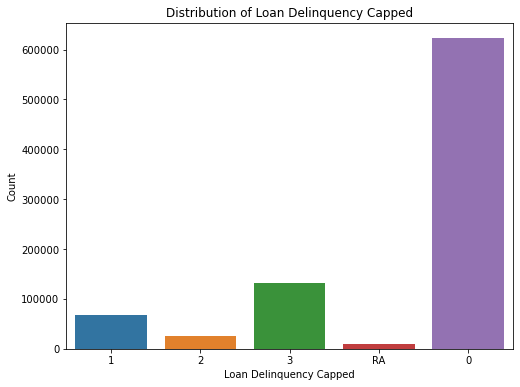

In [14]:
# Optionally, you can plot the distribution for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Delinquency Capped', data=df)
plt.title('Distribution of Loan Delinquency Capped')
plt.xlabel('Loan Delinquency Capped')
plt.ylabel('Count')
plt.show()

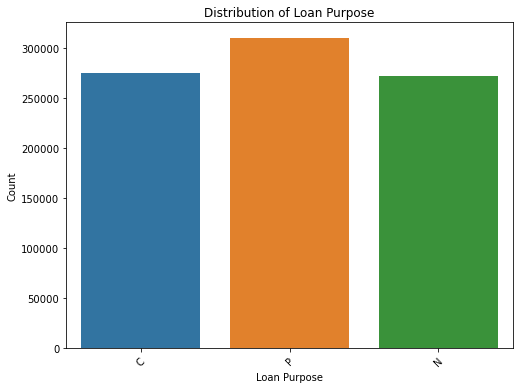

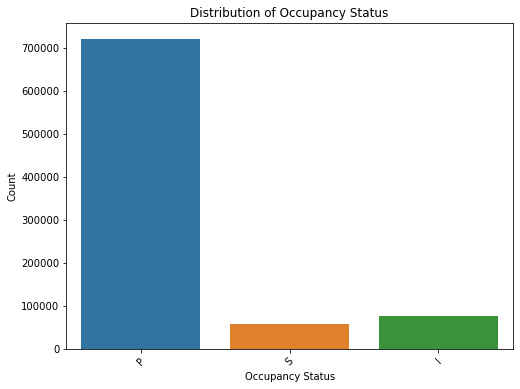

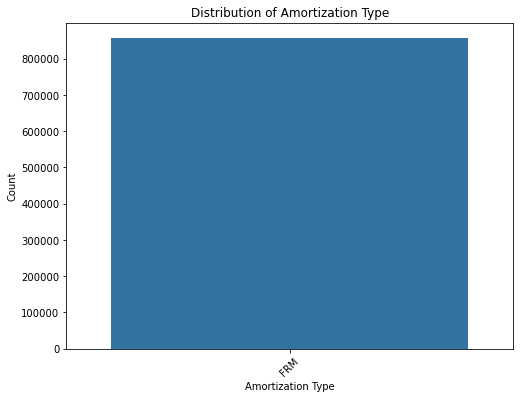

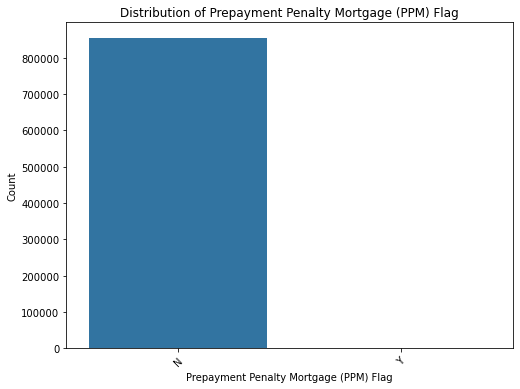

In [15]:
# List of categorical columns to visualize
categorical_columns = ['Loan Purpose', 'Occupancy Status', 'Amortization Type', 
                       'Prepayment Penalty Mortgage (PPM) Flag']

# Plot the distribution of each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


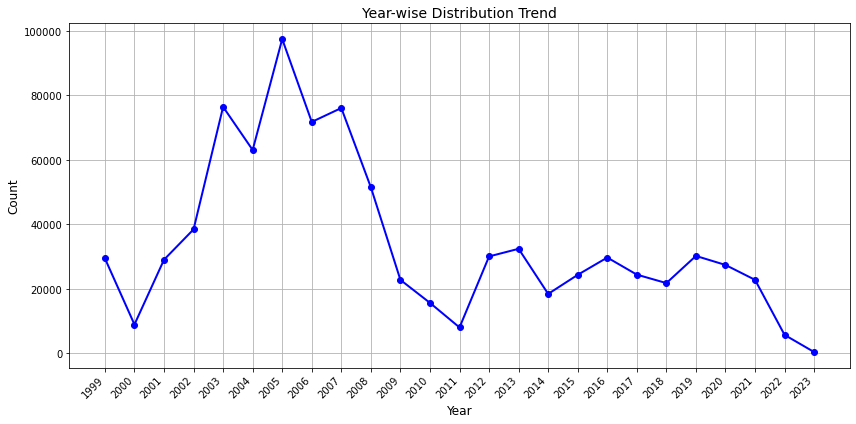

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'yr' is the column for year distribution

# Group by the 'yr' column to get the count of each year
yearly_counts = df['yr'].value_counts().sort_index()  # Sort by year

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='b', linestyle='-', linewidth=2)

# Customize the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels and adjust their position

# Adding labels and title
plt.title('Year-wise Distribution Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding gridlines
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


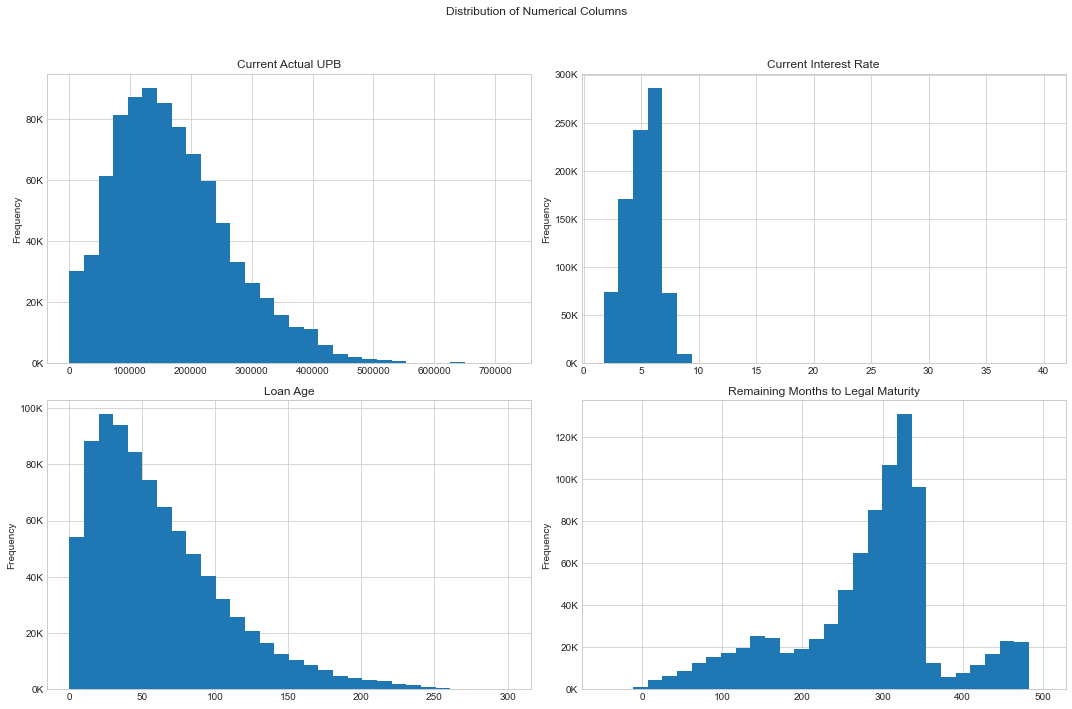

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-whitegrid')
# Formatter function to add commas and convert to thousands
def thousands(x, pos):
    return f'{int(x/1000):,}K'

# Select columns
num_columns = ['Current Actual UPB', 'Current Interest Rate', 'Loan Age', 'Remaining Months to Legal Maturity']

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Numerical Columns")

for i, col in enumerate(num_columns):
    ax = axes[i // 2, i % 2]
    df[col].plot(kind='hist', bins=30, ax=ax)
    ax.set_title(col)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands))  # Format y-axis

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


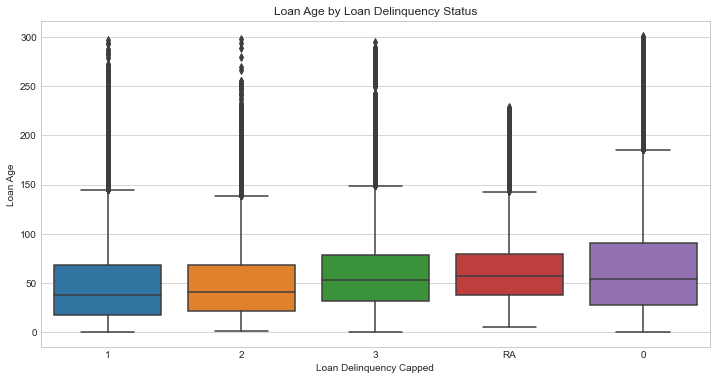

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Loan Delinquency Capped', y='Loan Age')
plt.title("Loan Age by Loan Delinquency Status")
plt.xticks(rotation=0)
plt.show()

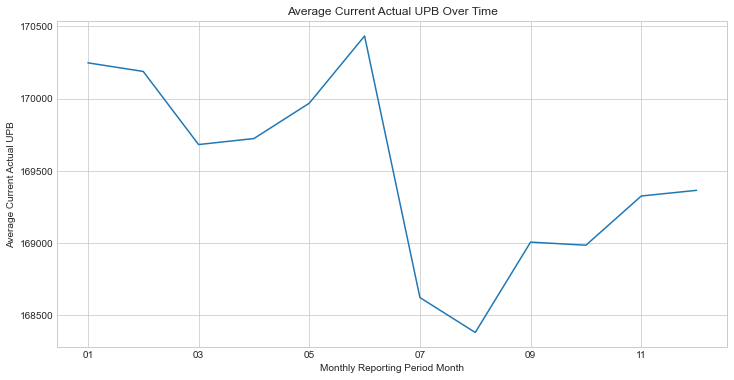

In [23]:
#df['Monthly Reporting Period Month'] = pd.to_datetime(df['Monthly Reporting Period Month'])
df_time_series = df.groupby('Monthly Reporting Period Month')['Current Actual UPB'].mean()

plt.figure(figsize=(12, 6))
df_time_series.plot()
plt.title("Average Current Actual UPB Over Time")
plt.ylabel("Average Current Actual UPB")
plt.show()

In [24]:
import pandas as pd

# Example data
#data = {'Monthly Reporting Period': ['201301', '201302', '201303']}

# Convert to DataFrame
#df = pd.DataFrame(data)

# Parse date column
df['date_check'] = pd.to_datetime(df['Monthly Reporting Period'], format='%Y%m', errors='coerce')

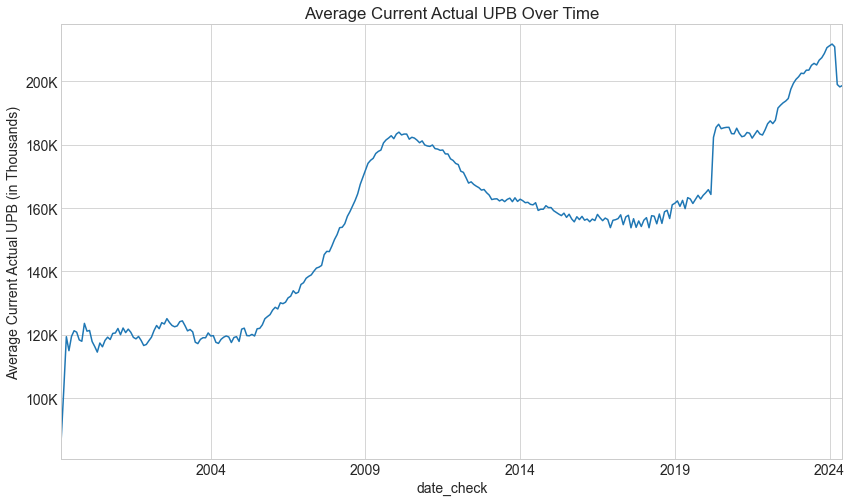

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample Data
# Assuming `df` already exists with 'date_check' and 'Current Actual UPB' columns
df['date_check'] = pd.to_datetime(df['date_check'])
df_time_series = df.groupby('date_check')['Current Actual UPB'].mean()

# Function to format y-axis labels
def thousands(x, pos):
    return f'{x / 1000:.0f}K'

# Create figure and plot
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 14})
ax = df_time_series.plot()

# Format y-axis labels to show values in thousands
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

# Add labels and title
plt.title("Average Current Actual UPB Over Time")
plt.ylabel("Average Current Actual UPB (in Thousands)")
plt.show()


In [ ]:
## Adding external datasets

In [42]:
## UNEMPLOYMENT DATASET

df_secondary = pd.read_excel('LAUS_NV_1976_2023_edited.xlsx')
df_secondary = df_secondary[['Month Year Key', 'Employed', 'Labor_Force', 'Unemployed', 'Unemployment_Rate']]

df['Monthly Reporting Period'] = df['Monthly Reporting Period'].astype(str)
df_secondary['Month Year Key'] = df_secondary['Month Year Key'].astype(str)
# Merge the main DataFrame with the selected columns from the secondary DataFrame
merged_df = df.merge(df_secondary, left_on='Monthly Reporting Period', right_on='Month Year Key', how='left')

# Drop the duplicate 'Month_Year_Key' column if not needed after the merge
merged_df.drop(columns=['Month Year Key'], inplace=True)


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856713 entries, 0 to 856712
Data columns (total 72 columns):
 #   Column                                                        Non-Null Count   Dtype         
---  ------                                                        --------------   -----         
 0   Loan Sequence Number                                          856713 non-null  object        
 1   Monthly Reporting Period                                      856713 non-null  object        
 2   Current Actual UPB                                            856713 non-null  float64       
 3   Current Loan Delinquency Status                               856713 non-null  object        
 4   Loan Age                                                      856713 non-null  int64         
 5   Remaining Months to Legal Maturity                            856713 non-null  int64         
 6   Defect Settlement Date                                        856713 non-null  object       

In [37]:
merged_df_2[merged_df_2['Monthly Reporting Period Year'] == "2023"]

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Defect Settlement Date,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Loan Delinquency Capped,Monthly Reporting Period Year,Monthly Reporting Period Month,date_check,Employed,Labor_Force,Unemployed,Unemployment_Rate,index_nsa,NVPROPTAX
765,F04Q10513725,202301,0.00,0,67,413,nan,P,2.0,202301.0,...,0,2023,01,2023-01-01,1482858.0,1569407.0,86549.0,5.5,583.69,1492323.0
1365,F04Q10055342,202301,76746.49,0,149,276,nan,P,NaN,nan,...,0,2023,01,2023-01-01,1482858.0,1569407.0,86549.0,5.5,583.69,1492323.0
1366,F04Q10055342,202302,76587.46,0,150,275,nan,P,NaN,nan,...,0,2023,02,2023-02-01,1483635.0,1570746.0,87111.0,5.5,583.69,1492323.0
1367,F04Q10055342,202303,76427.83,0,151,274,nan,P,NaN,nan,...,0,2023,03,2023-03-01,1486024.0,1572677.0,86653.0,5.5,583.69,1492323.0
1368,F04Q10055342,202304,76267.60,0,152,273,nan,P,NaN,nan,...,0,2023,04,2023-04-01,1489979.0,1575704.0,85725.0,5.4,591.79,1492323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856337,F03Q40352599,202308,48872.79,0,235,125,nan,NaN,NaN,nan,...,0,2023,08,2023-08-01,1506264.0,1591884.0,85620.0,5.4,604.05,1492323.0
856338,F03Q40352599,202309,48642.14,0,236,124,nan,NaN,NaN,nan,...,0,2023,09,2023-09-01,1513756.0,1600363.0,86607.0,5.4,604.05,1492323.0
856339,F03Q40352599,202310,48410.36,0,237,123,nan,NaN,NaN,nan,...,0,2023,10,2023-10-01,1520261.0,1607481.0,87220.0,5.4,604.59,1492323.0
856340,F03Q40352599,202311,48177.45,0,238,122,nan,NaN,NaN,nan,...,0,2023,11,2023-11-01,1529085.0,1616249.0,87164.0,5.4,604.59,1492323.0


In [44]:
## HOUSE PRICE INDEX DATASET

df1 = pd.read_csv('hpi_master_edited.csv')
quarter_to_months = {
    1: ['01', '02', '03'],  # Quarter 1 -> January, February, March
    2: ['04', '05', '06'],  # Quarter 2 -> April, May, June
    3: ['07', '08', '09'],  # Quarter 3 -> July, August, September
    4: ['10', '11', '12']   # Quarter 4 -> October, November, December
}

# Expand df1 by converting each quarter into its corresponding months
expanded_rows = []
for _, row in df1.iterrows():
    year = row['yr']
    quarter = row['period']
    months = quarter_to_months[quarter]
    
    for month in months:
        expanded_rows.append({'hpi_type': row['hpi_type'],
                              'hpi_flavor': row['hpi_flavor'],
                              'yr': year,
                              'month': month,  # Add month
                              'period': quarter,
                              'index_nsa': row['index_nsa']})

# Create a new dataframe from expanded rows
expanded_df = pd.DataFrame(expanded_rows)
expanded_df['yr'] = expanded_df['yr'].astype(str)  # Ensure the year is an integer
merged_df['Monthly Reporting Period Month'] = merged_df['Monthly Reporting Period Month'].astype(str) 

# Merge the expanded_df with df2 on 'yr' and 'month'
merged_df_1 = pd.merge(merged_df, expanded_df, right_on=['yr', 'month'], left_on=['Monthly Reporting Period Year', 'Monthly Reporting Period Month'], how='left')
merged_df_1.drop(columns=['yr_y','month', 'period', 'hpi_type', 'hpi_flavor'], inplace=True)


In [46]:
# Nevada Property Tax data
#Convert column data types to strings to align them for merging
df2 = pd.read_csv('NVPROPTAX_edited.csv')
merged_df_1['Monthly Reporting Period Year'] = merged_df_1['Monthly Reporting Period Year'].astype(str)
df2['yr'] = df2['yr'].astype(str)

# Merge the DataFrames
merged_df_2 = pd.merge(
    merged_df_1, 
    df2, 
    right_on=['yr'], 
    left_on=['Monthly Reporting Period Year'], 
    how='left'
)

# Drop the 'yr' column as it is no longer needed
merged_df_2.drop(columns='yr', inplace=True)


In [47]:
## check
rows_with_na = merged_df_2[merged_df_2['NVPROPTAX'].isna()]

In [48]:
print(rows_with_na)

Empty DataFrame
Columns: [Loan Sequence Number, Monthly Reporting Period, Current Actual UPB, Current Loan Delinquency Status, Loan Age, Remaining Months to Legal Maturity, Defect Settlement Date, Modification Flag, Zero Balance Code, Zero Balance Effective Date, Current Interest Rate, Current Non-Interest Bearing UPB, Due Date of Last Paid Installment (DDLPI), MI Recoveries, Net Sale Proceeds, Non MI Recoveries, Total Expenses, Legal Costs, Maintenance and Preservation Costs, Taxes and Insurance, Miscellaneous Expenses, Actual Loss Calculation, Cumulative Modification Cost, Step Modification Flag, Payment Deferral, Estimated Loan to Value (ELTV), Zero Balance Removal UPB, Delinquent Accrued Interest, Delinquency Due to Disaster, Borrower Assistance Status Code, Current Month Modification Cost, Interest Bearing UPB, Credit Score, First Payment Date, First Time Homebuyer Flag, Maturity Date, Metropolitan Statistical Area (MSA) or Metropolitan Division, Mortgage Insurance Percentage (MI 

In [50]:
## CALIFORNIA TO NEVADA MIGRATION DATASET
merged_df_2['Monthly Reporting Period Year'] = merged_df_2['Monthly Reporting Period Year'].astype(str)

df3= pd.read_csv('StateWiseMigration_edited.csv')

df3['Year'] = df3['Year'].astype(str)
merged_df_3 = pd.merge(merged_df_2, df3, right_on=['Year'], left_on=['Monthly Reporting Period Year'], how='left')

merged_df_3.drop(columns = 'Year', inplace = True)


In [52]:
## check
merged_df_3[merged_df_3['Monthly Reporting Period Year'] == "2005"]

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Defect Settlement Date,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Monthly Reporting Period Month,date_check,Employed,Labor_Force,Unemployed,Unemployment_Rate,index_nsa,NVPROPTAX,Cal migration Estimate,Cal migration MOE(+-)
14,F04Q10177271,200502,247206.49,1,11,349,nan,NaN,NaN,nan,...,02,2005-02-01,1154565.0,1205680.0,51115.0,4.2,365.03,149008.0,"56,135","+/- 6,536"
15,F04Q10177271,200503,246632.30,0,12,348,nan,NaN,NaN,nan,...,03,2005-03-01,1159620.0,1210546.0,50926.0,4.2,365.03,149008.0,"56,135","+/- 6,536"
16,F04Q10177271,200504,246343.23,0,13,347,nan,NaN,NaN,nan,...,04,2005-04-01,1165081.0,1215779.0,50698.0,4.2,384.45,149008.0,"56,135","+/- 6,536"
17,F04Q10177271,200505,246052.83,0,14,346,nan,NaN,NaN,nan,...,05,2005-05-01,1170797.0,1221363.0,50566.0,4.1,384.45,149008.0,"56,135","+/- 6,536"
18,F04Q10177271,200506,245468.04,0,15,345,nan,NaN,NaN,nan,...,06,2005-06-01,1176365.0,1227044.0,50679.0,4.1,384.45,149008.0,"56,135","+/- 6,536"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856366,F03Q40412630,200510,67041.47,0,21,219,nan,NaN,NaN,nan,...,10,2005-10-01,1194538.0,1245346.0,50808.0,4.1,412.74,149008.0,"56,135","+/- 6,536"
856367,F03Q40412630,200511,66712.23,0,22,218,nan,NaN,NaN,nan,...,11,2005-11-01,1198920.0,1249182.0,50262.0,4.0,412.74,149008.0,"56,135","+/- 6,536"
856368,F03Q40412630,200512,66500.32,0,23,217,nan,NaN,NaN,nan,...,12,2005-12-01,1203581.0,1253457.0,49876.0,4.0,412.74,149008.0,"56,135","+/- 6,536"
856665,F03Q40378939,200505,216116.11,1,16,344,nan,NaN,NaN,nan,...,05,2005-05-01,1170797.0,1221363.0,50566.0,4.1,384.45,149008.0,"56,135","+/- 6,536"


In [53]:
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856713 entries, 0 to 856712
Data columns (total 76 columns):
 #   Column                                                        Non-Null Count   Dtype         
---  ------                                                        --------------   -----         
 0   Loan Sequence Number                                          856713 non-null  object        
 1   Monthly Reporting Period                                      856713 non-null  object        
 2   Current Actual UPB                                            856713 non-null  float64       
 3   Current Loan Delinquency Status                               856713 non-null  object        
 4   Loan Age                                                      856713 non-null  int64         
 5   Remaining Months to Legal Maturity                            856713 non-null  int64         
 6   Defect Settlement Date                                        856713 non-null  object       

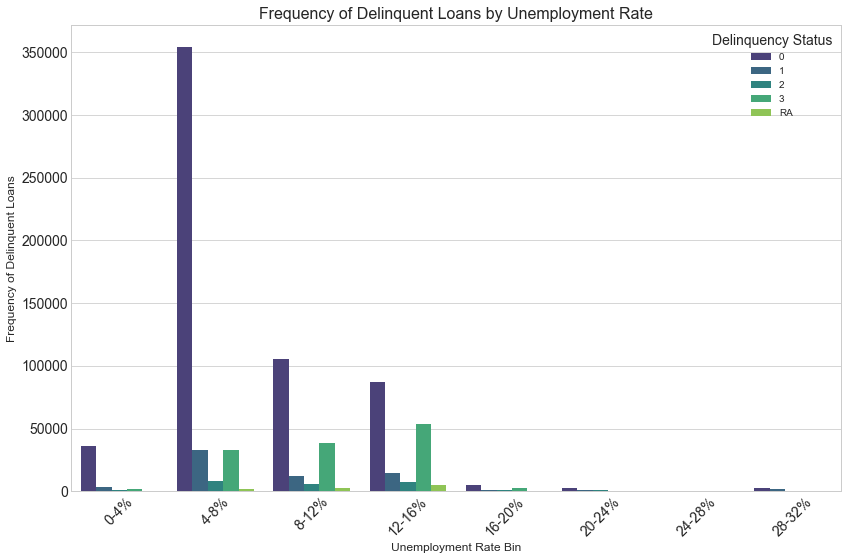

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the dataset to focus on delinquent loans
# Assume "Current Loan Delinquency Status" column holds delinquency information
delinquent_loans = merged_df_3  # Exclude non-delinquent loans

# Step 2: Group by delinquency type and unemployment rate
# Convert "Unemployment_Rate" to categorical bins for better visualization
delinquent_loans['Unemployment_Rate_Bin'] = pd.cut(
    delinquent_loans['Unemployment_Rate'], 
    bins=[0, 4, 8, 12, 16, 20, 24, 28, 32],  # Adjust bins based on your dataset's range
    labels=['0-4%', '4-8%', '8-12%', '12-16%', '16-20%', '20-24%', '24-28%', '28-32%']
)

# Aggregate frequencies of delinquency types per unemployment rate bin
grouped = delinquent_loans.groupby(['Unemployment_Rate_Bin', 'Loan Delinquency Capped']).size().reset_index(name='Frequency')

# Step 3: Create the chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped, 
    x='Unemployment_Rate_Bin', 
    y='Frequency', 
    hue='Loan Delinquency Capped', 
    palette='viridis'
)

# Step 4: Add titles and labels
plt.title('Frequency of Delinquent Loans by Unemployment Rate', fontsize=16)
plt.xlabel('Unemployment Rate Bin', fontsize=12)
plt.ylabel('Frequency of Delinquent Loans', fontsize=12)
plt.legend(title='Delinquency Status', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


In [59]:
merged_df_3.to_csv('Freddiewithexternal.csv')